#### Welcome to Assingment  2 of Machine Learning Course 5DV194! 
The task is to develop regression algorithms to predict house prices.
#### Deadline of Assignment 2:
28 Feb, 2022 (17:00 Stockholm time)


#### Goal 
To practice linear regression and neural network on housing price prediction. Additionally, to get familiar with the libraries of pandas (e.g., data frame), tensorflow (e.g., sequential), sklearn (e.g., linear regression, ridge regression, preprocessing).
#### Dataset
The Boston Housing Dataset
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html     
Read it in order to know the meaning of different attributes (e.g, RM - average number of rooms per dwelling)

 

#### Grading (200 points) 
Follow this jupyter notebook file below, you will find some Tasks (answer by coding) and Questions(answer by text).
No report is needed.
 
Compress all required files (e.g., Assignment2_regression.ipynb, new dataset file) in a zip file and name the zip file in the format of "FirstName_LastName_assignment2.zip"  upload to Canvas/Assignments/Assignment-2.


## Import  some libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Task-1: import the library of 'numpy' and give it an alias as "np" (2 points)

In [2]:
import numpy as np

## Get the data

In [3]:
from sklearn.datasets import load_boston
housing_data = load_boston()

## Explore the data a bit

In [4]:
# Checing the keys of the dataset, which is in dictionary format.
print(housing_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
# Checking description of the dataset
print (housing_data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Converting the data into Data Frame using pandas
boston = pd.DataFrame(housing_data.data)
#Assigning feature-names to colums of data frame
boston.columns = housing_data.feature_names

#### Task-2: Print the first ten rows for the dataframe boston (2 points)

In [7]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [8]:
#Adding the target column Price to the data frame
boston['PRICE'] = housing_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Let's see how the data structure looks like now
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Task-3: Return the Summary Statistic of the numeric columns for dataframe boston by applying the method 'describe' of data frame. (2 points)

In [10]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Before going to machine learning algorithms, we should understand the data a  bit more.

#### Task-4: Present a heatmap on above Boston dataset by using seaborn or any other libraries you prefer. (3 points)

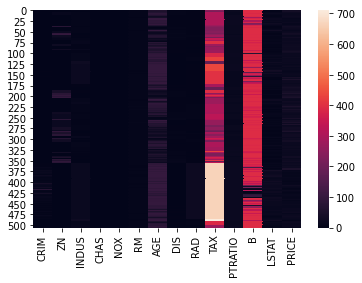

In [11]:
ax = sns.heatmap(boston)

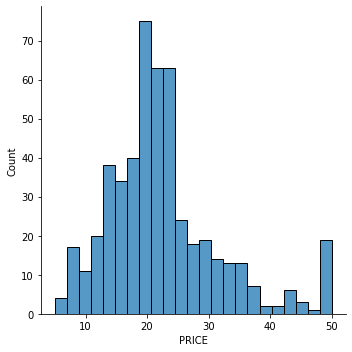

In [12]:
# Distributing of PRICE Column
sns.displot(boston['PRICE'])

#### Task-5: try yourself to distribute another two columns (e.g., number of rooms, nitric oxides concentration) (4 points)

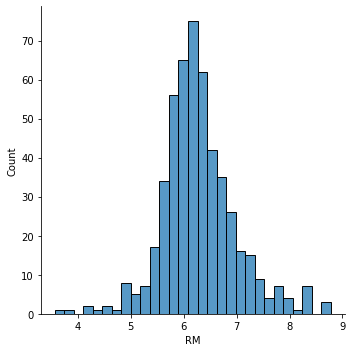

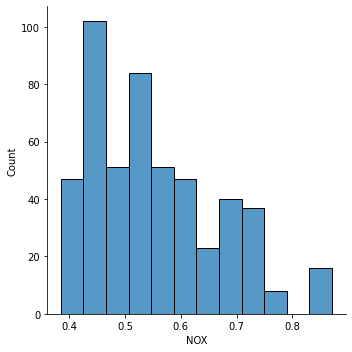

In [13]:
sns.displot(boston['RM'])
sns.displot(boston['NOX'])


#### Now, let's try machine learning regression models. 

## Algorithm1: Linear Regression

In [14]:
# Creating Predictor variable 'X' and Target Variable 'y'

# X contains all the features except for the target value Price
X = boston.drop('PRICE', axis = 1)
y = boston['PRICE']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##### Task-6: complete the following line of code which splits the data into training and test set: X_train contains 70% of total dataset, X_test contains 30% (4 points)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=0)

# X_train contains 70% of total dataset
print(X_train.shape)
# X_test contains 30% of total dataset
print(X_test.shape)

(354, 13)
(152, 13)


In [17]:
lr = LinearRegression()

#### Task-7: fit the training dataset into linear regression model. (3 points)

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

#### Task-8:  print the intercept for above trained linaer regression models. (2 points)

In [19]:
print(lr.intercept_)

37.937107741833316


In [20]:
#Coefficients
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.121310
ZN,0.044466
INDUS,0.011342
CHAS,2.511246
NOX,-16.231253
RM,3.859068
AGE,-0.009985
DIS,-1.500270
RAD,0.242143
TAX,-0.011072


#### Task-9: complete the following line of codes which use the trained model above to predict the house prices on test dataset, and output the prediction result as "pred". (3 points)

In [21]:
pred = lr.predict(X_test)

Text(0, 0.5, 'Predicted prices')

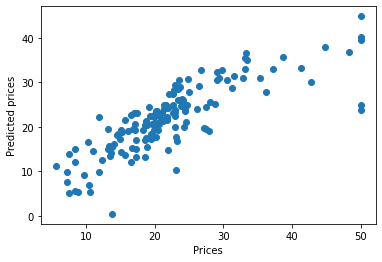

In [22]:
plt.scatter(y_test,pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

In [23]:
# evaluating and outputing the results using different evaluation metrics (i.e., MAE, MSE, RMSE).
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.6099040603818233
MSE: 27.19596576688338
RMSE: 5.21497514537542


#### Task-10: Try Ridge or Lasso regressions  (set alpha=1.0) and complete the following four following steps. (10 points)

In [24]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#step-1: Create a ridge or lasso regression model
rid = Ridge(alpha=1.0)


#step-2: Fit to our training data (i.e., X_train and y_train)
rid.fit(X_train,y_train)

#step-3: Apply the model to predict on our testing data (i.e., X_test)
predict = rid.predict(X_test)  
#step-4: Print prediction performance RMSE

print(predict)

[2.49766729e+01 2.32843316e+01 2.89093877e+01 1.20415177e+01
 2.07252633e+01 1.97166295e+01 2.02678199e+01 2.16169077e+01
 1.92065079e+01 2.00914515e+01 5.36445144e+00 1.60305836e+01
 1.75915532e+01 5.36864018e+00 3.97620466e+01 3.22308853e+01
 2.17135018e+01 3.61699665e+01 3.11663566e+01 2.33510761e+01
 2.48749527e+01 2.39890591e+01 2.04451199e+01 3.03036168e+01
 2.21933303e+01 9.54495939e+00 1.76238219e+01 1.97090782e+01
 3.52507706e+01 2.04003752e+01 1.77444317e+01 1.81536076e+01
 1.90509214e+01 2.31020741e+01 2.86223100e+01 2.01272499e+01
 1.11285171e+01 2.46523543e+01 1.72269198e+01 1.47365079e+01
 2.57390213e+01 2.06590782e+01 2.21401951e+01 1.47049513e+01
 2.29352767e+01 2.45908438e+01 1.89804171e+01 2.45205886e+01
 1.12045887e+01 2.43192446e+01 2.29602076e+01 1.81908251e+01
 2.41007868e+01 3.04495575e+01 1.36034624e+01 2.16364459e+01
 2.05122613e+01 1.50750105e+01 1.35483075e+01 2.15246005e+01
 1.75466654e+01 2.17457454e+01 3.27494951e+01 3.15007761e+01
 1.73937728e+01 3.239607

#### Question: Is Ridge regression and Lasso regression linear regression?  What is differnece between Ridge and Lasso regressions? (5 points)

Answer: Yes, ridge and lasso regression are both linear regression. Lasso makes cofficients to absolute zero but Ridge has no intension to make cofficients value to zero.

#### Task-11: Above, we've used the existing libriaries to implment linear regression, now let's try to implement a simple 2-dimension linear regression in order to understand it better. (40 points)  

#### Some concepts in 2-D linear regression:
##### x: input data points
##### y: predicted value 
##### a: intercept 
##### b: bias/slope of the regression line 

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7

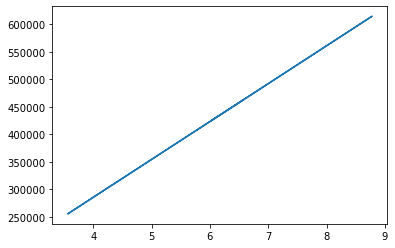

0      462771.692376
1      452185.724418
2      504703.123897
3      491848.734234
4      502091.001933
           ...      
501    464009.013306
502    431494.968865
503    490336.453097
504    477825.763692
505    425308.364214
Name: RM, Length: 506, dtype: float64


In [93]:
# Input: Boston data (in format of pandas data frame)
# Task: Train (using SGD), visualize, test and evaluate a 2-dimension linear regression model (e.g., y = a + bx)
# Requirment: without using inbuilt machine learning libraries. Okay let's get started:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Step 1: downlaod the data and prepare the input
housing_data = load_boston()
data = pd.DataFrame(housing_data.data)
data.columns = housing_data.feature_names
data['PRICE'] = housing_data.target

# Step 2: define your dependent variable y (i.e., PRICE) and independent variable x (e.g., RM or any other attribute)
X = data['RM']
Y = data['PRICE']

# Initialization of intercept a and slop b
a = 0
b = 0
 
# print the first ten rows for the data (refer to Task-2) 
print(data.head(10))

# Step 3: predefine the values for parameters in SGD-stochastic gradient descent (e.g., learning rate, iteration)
# define the learning rate for SGD 
L = 0.1
# define the number of iterations to perform SGD
epochs = 5
# the number of elements in X
n = float(len(X))  

# Step 4: performe SGD and return the optmized value for a and b
for i in range(epochs): 
    Y_pred = a*X + b   
    D_a = (-2/n) * sum(X * (Y - Y_pred))   
    D_b = (-2/n) * sum(Y - Y_pred)   
    a = a - L * D_a  
    b = b - L * D_b   
    
print (a, b)
 
# Step 5: calculate R-squared value to evaluate our current model. 
# for R-squared, refer to https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy)2.-,R%202%20%3D%201%20%E2%88%92%20sum%20squared%20regression%20(SSR)%20total,from%20the%20mean%20all%20squared.

r2 = r2_score(X,Y) 
 
#Step 6: plot our regression model (the line in this example) by using plt (matplotlib.pyplot)

plt.plot(X, a*X+b)
plt.show()

# Step 7: predict result (i.e., PRICE vallue) for a given unseen point (give a value to x_unseen)  
 
predicate = a*X + b
print(predicate)
 

## Algorithm2: Neural Networks - Regression

In [26]:
X = boston.drop('PRICE', axis = 1)
Y = boston['PRICE']

In [27]:
from sklearn import preprocessing

#### Task-12: complete the following codes which apply the preprocessing method MinMaxScaler to scale the given training data X  and assign the scaled training data to variable X_scale. (10 points)

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X_train)

#### Task-13: complete the following codes which first split the training data into training and validation_test sets (e.g., 70/30), then split the validation_test set into validation and test (e.g.,50/50). (5 points)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test =  train_test_split(X, y,train_size=0.7, random_state=0)
X_val, X_test, Y_val, Y_test =  train_test_split(X, y,test_size=0.5, random_state=0)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(354, 13) (253, 13) (253, 13) (354,) (253,) (253,)


In [30]:
# import libraries of tensorflow to build neurral networks.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Task-14: complete the following codes which build a two layers neural network model by using Sequential. (10 points)
#### FYI: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

In [31]:
# Build model
model = Sequential([
    Dense(12, activation='relu'),
    Dense(12, activation='softmax'),
])

#### Task-15: compile the model (use mean_squared_error as loss function, and apply metrics=['mse', 'mae', 'mape'])  (5 points)

In [32]:
# Compile model
model.compile(loss='mean_squared_error', metrics=['mse', 'mae', 'mape'])


#### Task-16: compelte the following codes which train/fit the model using the function of fit  (both training data and valiation data will be used)  (5 points)

In [33]:
hist = model.fit(X_train,Y_train,validation_data = (X_val,Y_val),epochs=100) 

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

12/12 [==============================] - 0s 41ms/step - loss: 598.4138 - mse: 598.4138 - mae: 22.6621 - mape: 99.5679 - val_loss: 619.9897 - val_mse: 619.9897 - val_mae: 22.9657 - val_mape: 99.5671
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 598.4138 - mse: 598.4138 - mae: 22.6621 - mape: 99.5679 - val_loss: 619.9897 - val_mse: 619.9897 - val_mae: 22.9657 - val_mape: 99.5671
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 598.4138 - mse: 

12/12 [==============================] - 0s 3ms/step - loss: 598.4137 - mse: 598.4137 - mae: 22.6621 - mape: 99.5679 - val_loss: 619.9897 - val_mse: 619.9897 - val_mae: 22.9657 - val_mape: 99.5671
Epoch 37/100
12/12 [==============================] - 0s 3ms/step - loss: 598.4138 - mse: 598.4138 - mae: 22.6621 - mape: 99.5679 - val_loss: 619.9897 - val_mse: 619.9897 - val_mae: 22.9657 - val_mape: 99.5671
Epoch 38/100
12/12 [==============================] - 0s 4ms/step - loss: 598.4138 - mse: 598.4138 - mae: 22.6621 - mape: 99.5679 - val_loss: 619.9897 - val_mse: 619.9897 - val_mae: 22.9657 - val_mape: 99.5671
Epoch 39/100
12/12 [==============================] - 0s 3ms/step - loss: 598.4138 - mse: 598.4138 - mae: 22.6621 - mape: 99.5679 - val_loss: 619.9897 - val_mse: 619.9897 - val_mae: 22.9657 - val_mape: 99.5671
Epoch 40/100
12/12 [==============================] - 0s 3ms/step - loss: 598.4138 - mse: 598.4138 - mae: 22.6621 - mape: 99.5679 - val_loss: 619.9897 - val_mse: 619.9897 - 

12/12 [==============================] - 0s 3ms/step - loss: 598.4138 - mse: 598.4138 - mae: 22.6621 - mape: 99.5679 - val_loss: 619.9897 - val_mse: 619.9897 - val_mae: 22.9657 - val_mape: 99.5671
Epoch 76/100
12/12 [==============================] - 0s 3ms/step - loss: 598.4138 - mse: 598.4138 - mae: 22.6621 - mape: 99.5679 - val_loss: 619.9897 - val_mse: 619.9897 - val_mae: 22.9657 - val_mape: 99.5671
Epoch 77/100
12/12 [==============================] - 0s 3ms/step - loss: 598.4138 - mse: 598.4138 - mae: 22.6621 - mape: 99.5679 - val_loss: 619.9897 - val_mse: 619.9897 - val_mae: 22.9657 - val_mape: 99.5671
Epoch 78/100
12/12 [==============================] - 0s 3ms/step - loss: 598.4138 - mse: 598.4138 - mae: 22.6621 - mape: 99.5679 - val_loss: 619.9897 - val_mse: 619.9897 - val_mae: 22.9657 - val_mape: 99.5671
Epoch 79/100
12/12 [==============================] - 0s 4ms/step - loss: 598.4138 - mse: 598.4138 - mae: 22.6621 - mape: 99.5679 - val_loss: 619.9897 - val_mse: 619.9897 - 

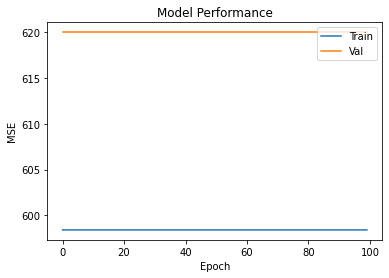

In [34]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Model Performance')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Task-17: evaluate the model on X_test and Y_test by applying the method 'evaluate'  (5 points)

In [35]:
# Evaluation
model.evaluate(
    x=X_test, y=Y_test, batch_size=None, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False)



8/8 [==============================] - 0s 877us/step - loss: 556.9598 - mse: 556.9598 - mae: 21.9333 - mape: 99.5575


[556.9598388671875, 556.9598388671875, 21.933269500732422, 99.5574951171875]

#### NON-mandatory task: if you have time/interest, you can visualize the prediction result and labels using scatter.

In [36]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#### Task-18:  Build the second neural network  model by completing the following codes (steps1 - step4). Here you are required to add two more optimization settings (e.g., regularizer parameter, and dropout) to train, evaluate, and predict as you did above.  (10 points)

In [37]:
# step-1: Build model 
from keras.layers import Dropout
model_2 = Sequential([
    Dense(60, activation='relu'),
    Dropout(0.2, input_shape=(60,)),
    Dense(30, activation='softmax'),
    Dropout(0.2, input_shape=(60,)),
    Dense(60, activation='relu'),
    Dropout(0.2, input_shape=(60,)),
    Dense(30, activation='sigmoid'),
])
 

# step-2: Compile model
model_2.compile(loss='mean_squared_error', metrics=['mse', 'mae', 'mape'])

# # step-3: Train/Fit the model
hist_2 = model_2.fit(X_train,Y_train,validation_data = (X_val,Y_val),epochs=100) 

# step-4: Evalution
model_2.evaluate(
    x=X_test, y=Y_test, batch_size=None, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

12/12 [==============================] - 0s 22ms/step - loss: 578.9127 - mse: 578.9127 - mae: 22.2291 - mape: 97.3210 - val_loss: 599.1110 - val_mse: 599.1110 - val_mae: 22.5086 - val_mape: 97.1960
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 577.2872 - mse: 577.2872 - mae: 22.1941 - mape: 97.1467 - val_loss: 597.6785 - val_mse: 597.6785 - val_mae: 22.4764 - val_mape: 97.0251
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 575.8977 - mse: 

Epoch 37/100
12/12 [==============================] - 0s 3ms/step - loss: 557.6404 - mse: 557.6404 - mae: 21.7457 - mape: 94.8160 - val_loss: 578.6501 - val_mse: 578.6501 - val_mae: 22.0490 - val_mape: 94.8049
Epoch 38/100
12/12 [==============================] - 0s 3ms/step - loss: 557.6384 - mse: 557.6384 - mae: 21.7457 - mape: 94.8155 - val_loss: 578.6500 - val_mse: 578.6500 - val_mae: 22.0490 - val_mape: 94.8049
Epoch 39/100
12/12 [==============================] - 0s 4ms/step - loss: 557.6366 - mse: 557.6366 - mae: 21.7456 - mape: 94.8153 - val_loss: 578.6500 - val_mse: 578.6500 - val_mae: 22.0490 - val_mape: 94.8049
Epoch 40/100
12/12 [==============================] - 0s 6ms/step - loss: 557.6343 - mse: 557.6343 - mae: 21.7456 - mape: 94.8151 - val_loss: 578.6500 - val_mse: 578.6500 - val_mae: 22.0490 - val_mape: 94.8049
Epoch 41/100
12/12 [==============================] - 0s 4ms/step - loss: 557.6337 - mse: 557.6337 - mae: 21.7456 - mape: 94.8149 - val_loss: 578.6499 - val_mse

12/12 [==============================] - 0s 4ms/step - loss: 557.6304 - mse: 557.6304 - mae: 21.7455 - mape: 94.8146 - val_loss: 578.6499 - val_mse: 578.6499 - val_mae: 22.0490 - val_mape: 94.8049
Epoch 77/100
12/12 [==============================] - 0s 3ms/step - loss: 557.6304 - mse: 557.6304 - mae: 21.7455 - mape: 94.8145 - val_loss: 578.6499 - val_mse: 578.6499 - val_mae: 22.0490 - val_mape: 94.8049
Epoch 78/100
12/12 [==============================] - 0s 3ms/step - loss: 557.6304 - mse: 557.6304 - mae: 21.7455 - mape: 94.8146 - val_loss: 578.6499 - val_mse: 578.6499 - val_mae: 22.0490 - val_mape: 94.8049
Epoch 79/100
12/12 [==============================] - 0s 3ms/step - loss: 557.6304 - mse: 557.6304 - mae: 21.7455 - mape: 94.8146 - val_loss: 578.6499 - val_mse: 578.6499 - val_mae: 22.0490 - val_mape: 94.8049
Epoch 80/100
12/12 [==============================] - 0s 3ms/step - loss: 557.6304 - mse: 557.6304 - mae: 21.7455 - mape: 94.8146 - val_loss: 578.6499 - val_mse: 578.6499 - 

[517.5126342773438, 517.5126342773438, 21.0166015625, 94.68999481201172]

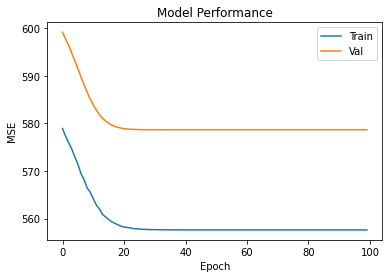

In [38]:
plt.plot(hist_2.history['mse'])
plt.plot(hist_2.history['val_mse'])
plt.title('Model Performance')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Task-19:  Now, let's try to train and validate a third neural network on given Boston dataset using codes above (i.e., tensorflow) or any other libraries you prefer (e.g., Pytorch).  (50 points)
In this training and validation process, you are required to explore more optimization settings, such as two other different suitable activiation functions, Keras optimizers (we only learned sgd in course), different batch sizes, different loss functions. Afterwards, find by yourself a small test dataset or part of a big dataset (e.g., around 100 data samples), test your trained model on this new dataset, and print out the performance (e.g., mse, rmse). Do not forget to include your provided test datset file in submission zip.  

##### Task-20: Discussion and analysis on above experimental results regarding different algorithms, different settings and performance. (15 points) 

Linear regression: Here we need to find co-efficent values and then we calculate mse and mae.

Neural networks: Here split the dataset into different neurons. For each layer neurons we calculate mse and mae.

Comparision: 


House price vary for "-B" attribute. Proportion of black people is also a important fature for Boston house prices. Using "-B" attribute we create a discrimination between black people and others. So this attribute leads ethical issue. 

#### Question: Any thoughts and suggestions on this assignment? (5 points)

Answer: No suggestions. I learn a lot about pandas, python and how can use dataset. I also learn how to apply algorithms on dataset.

#### Congratualtions if you ran through above!  